In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif'] = ['SimHei']  

In [79]:
single = [
    '电动车充电识别-数据/train/220V1A苹果笔记本/1686550995i.data',
    '电动车充电识别-数据/train/220V3.5A华硕天选4/1686555489i.data',
    '电动车充电识别-数据/train/220V800W饮水机/1686555017i.data',
    '电动车充电识别-数据/train/220V1150W微波炉/1686554404i.data',
    '电动车充电识别-数据/train/220V1500W电暖器/1686553373i.data',
    '电动车充电识别-数据/train/220V1800W烧水壶/1686551532i.data',
    '电动车充电识别-数据/train/220V碎纸机/1686553884i.data',
    '电动车充电识别-数据/train/手机/华为P30PRO手机/1686202202i.data',
    '电动车充电识别-数据/train/手机(工况：80%以下充电),带独显笔记本电脑(工况：未知)/1698884560378.data',
    '电动车充电识别-数据/train/电脑/thinkpadX1nano充电（笔记本电脑）/1686123044i.data',
    '电动车充电识别-数据/train/电脑(工况：未知),1500W电暖器(工况：未知)/1698884450451.data',
    '电动车充电识别-数据/train/电脑(工况：未知),碎纸机(工况：未知)/1698884567826.data',
    '电动车充电识别-数据/train/电风扇/电风扇3挡/1686117234i.data',
    '电动车充电识别-数据/train/电风扇(工况：未知),800W饮水机(工况：烧水),带独显笔记本电脑(工况：未知)/1698897603859.data',
    '电动车充电识别-数据/train/电风扇(工况：未知),带独显笔记本电脑(工况：未知),碎纸机(工况：未知),800W饮水机(工况：烧水)/1698897672443.data',

    '电动车充电识别-数据/train/电动车48V2.8A/1686115993i.data',
    '电动车充电识别-数据/train/电动车(工况：未知),1500W电暖器(工况：未知)/1698884461635.data',
]

names = [x.split('/')[-2].replace('(工况：未知)', '') for x in single]

import numpy as np
# plt.figure(figsize=(12, 5))
# for text in single:
#     data = pd.read_csv(text, header=None, names=['data']).to_numpy().astype(np.float64)
#     print(data.shape)
#     plt.plot(data, label=text)

# plt.legend()

<Axes: >

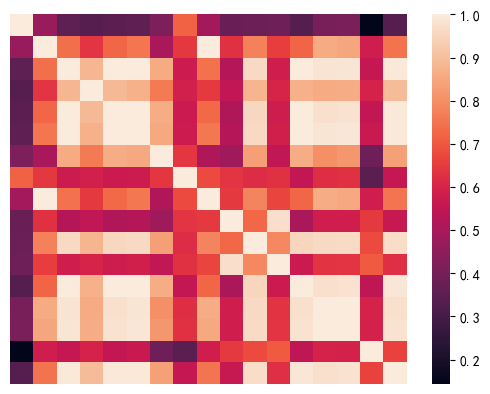

In [84]:
discribe_df = pd.DataFrame([], columns=[str(x) for x in range(1, 280+1)])
for text, route in zip(names, single):
    data = pd.read_csv(route, header=None, names=['data']).to_numpy().flatten()
    # print(data.shape)
    discribe_df.loc[len(discribe_df)] = data
discribe_df.index = names

import seaborn as sb
# plt.figure(figsize=(12, 12))
sb.heatmap(discribe_df.T.corr(), xticklabels=False, yticklabels=False)

In [57]:

discribe_df = pd.DataFrame([], columns=['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'skew', 'kurt', 'name'])
for text, route in zip(names, single):
    data = pd.read_csv(route, header=None, names=['data'])
    discribe = data.describe().T
    discribe['skew'] = data.skew()
    discribe['kurt'] = data.kurt()
    discribe['name'] = text
    discribe = discribe.to_numpy()[0]
    # print(discribe)
    discribe_df.loc[len(discribe_df)] = discribe

discribe_df

count       mean           std      min      25%     50%       75%  \
0   280.0  -1.482143    130.360294   -656.0    -20.0    -0.5      20.0   
1   280.0 -52.396429   1514.020221  -3140.0   -694.0  -132.0     664.5   
2   280.0       -0.3     3823.2574  -5435.0  -3775.0    -6.0    3782.0   
3   280.0 -17.332143  36765.823673 -55011.0 -34988.5 -1063.0  33927.75   
4   280.0  -0.207143    6949.66486  -9891.0  -6905.5   -10.5   6890.75   
5   280.0     -0.925   8249.822327 -11685.0 -8082.25    34.0    8098.5   
6   280.0  -1.364286    241.593907   -528.0   -93.25     0.0      90.5   
7   280.0   0.539286     89.121108   -259.0     -8.0     0.0       8.0   
8   280.0 -53.110714   1574.966987  -3152.0   -703.0  -140.5    671.25   
9   280.0   2.082143   2589.627956 -12038.0   -266.0    41.5     291.0   
10  280.0 -11.571429   8802.693249 -23950.0 -6868.75    -6.0    6833.0   
11  280.0   6.453571   2707.811064 -12133.0   -264.5     0.0     292.0   
12  280.0  -0.232143    196.134526   -277.0   -201.0     1.0     200.5   
13  280.0 -53.482143   5237.096264  -8385.0  -4888.5    28.5   4784.75   
14  280.0 -54.846429    5432.82977  -8813.0 -5171.25    28.5    5114.0   
15  280.0   0.585714   1281.303494  -4165.0    -40.0     6.0      44.0   
16  280.0  -1.282143   7720.254567 -13183.0 -6883.25    -9.0    6889.5   

        max      skew       kurt  \
0     611.0 -0.372662  14.834345   
1    3111.0 -0.086289  -0.866044   
2    5430.0 -0.000852   -1.51371   
3   59040.0  0.060809  -1.415367   
4    9890.0 -0.000042  -1.523618   
5   11737.0  0.000522   -1.51668   
6     528.0  0.000958  -0.050353   
7     259.0  0.094551   3.629248   
8    3114.0 -0.094837  -0.822718   
9   11878.0 -0.012781   9.081365   
10  24805.0  0.006019  -0.269439   
11  11499.0 -0.121523   7.636418   
12    274.0 -0.002868  -1.561772   
13   7913.0 -0.028794  -1.302867   
14   8273.0 -0.029237  -1.297935   
15   4121.0 -0.036531    4.75871   
16  13056.0 -0.000634  -1.291262   

                                                 name  
0                                         220V1A苹果笔记本  
1                                       220V3.5A华硕天选4  
2                                         220V800W饮水机  
3                                        220V1150W微波炉  
4                                        220V1500W电暖器  
5                                        220V1800W烧水壶  
6                                             220V碎纸机  
7                                          华为P30PRO手机  
8                      手机(工况：80%以下充电),带独显笔记本电脑(工况：未知)  
9                             thinkpadX1nano充电（笔记本电脑）  
10                          电脑(工况：未知),1500W电暖器(工况：未知)  
11                               电脑(工况：未知),碎纸机(工况：未知)  
12                                              电风扇3挡  
13          电风扇(工况：未知),800W饮水机(工况：烧水),带独显笔记本电脑(工况：未知)  
14  电风扇(工况：未知),带独显笔记本电脑(工况：未知),碎纸机(工况：未知),800W饮水机(...  
15                                         电动车48V2.8A  
16                         电动车(工况：未知),1500W电暖器(工况：未知)